

```

    Generate artificial classification data.


```



In [1]:
number_of_samples_per_class = 15
number_of_relevant_features = 30  # TODO assert complete number of features?

number_of_pseudo_class_features = 10
number_of_random_features = 100

In [2]:
import artificial_data_generator_tools

In [37]:
number_of_features_correlated_cluster1 = 34
correlated_cluster_1 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster1,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.6,
)

generation of correlation matrix ...


E:\Python\Sport\venv\lib\site-packages\statsmodels\stats\correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


generation of covariant matrix ...


E:\Python\Sport\venv\lib\site-packages\statsmodels\stats\correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


min absolute correlation: 0.17857142857142858


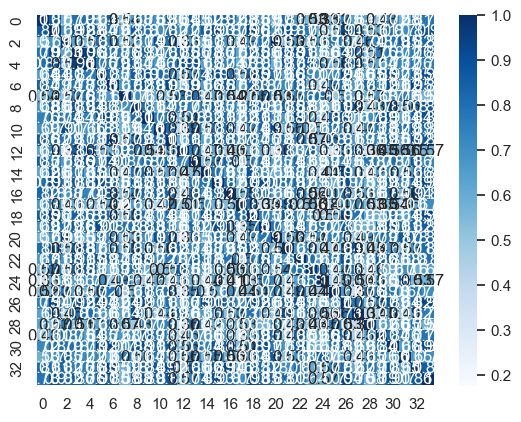

In [38]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_1)

In [39]:
number_of_features_correlated_cluster2 = 10
correlated_cluster_2 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=number_of_features_correlated_cluster2,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
)

generation of correlation matrix ...
generation of covariant matrix ...


E:\Python\Sport\venv\lib\site-packages\statsmodels\stats\correlation_tools.py:90: IterationLimitWarning: 
Maximum iteration reached.

  warnings.warn(iteration_limit_doc, IterationLimitWarning)


min absolute correlation: 0.8464285714285714


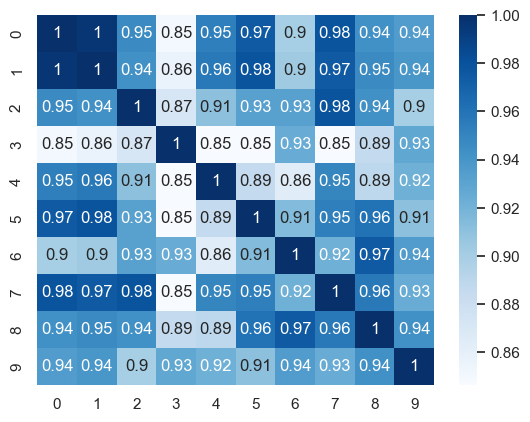

In [40]:
artificial_data_generator_tools.plot_correlated_cluster(correlated_cluster_2)

Generate complete class 1

In [41]:
class_components_list = [
    correlated_cluster_1,
    correlated_cluster_2,
]
number_of_unclustered_relevant_features = number_of_relevant_features - (
    number_of_features_correlated_cluster1 + number_of_features_correlated_cluster2
)
if number_of_unclustered_relevant_features > 0:
    unclustered_relevant_features = (
        artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
            number_of_samples=number_of_samples_per_class,
            number_of_normal_distributed_relevant_features=number_of_unclustered_relevant_features,
            scale=1,
        )
    )
    class_components_list.append(unclustered_relevant_features)

In [42]:
class1_np = artificial_data_generator_tools.build_class(
    class_features_list=class_components_list,
)

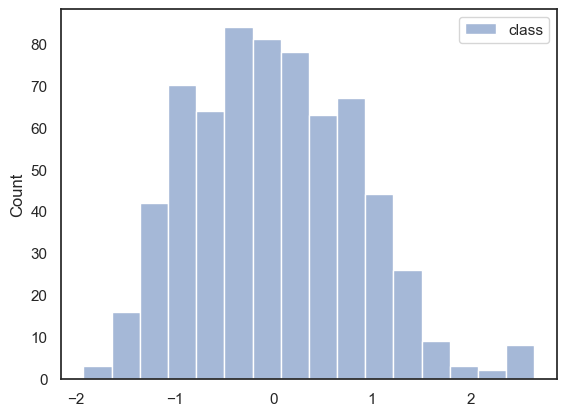

In [43]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_np)

In [44]:
log_normal_distributed_class1_np = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_np=class1_np
    )
)
assert log_normal_distributed_class1_np.shape[1] == number_of_relevant_features

AssertionError: 

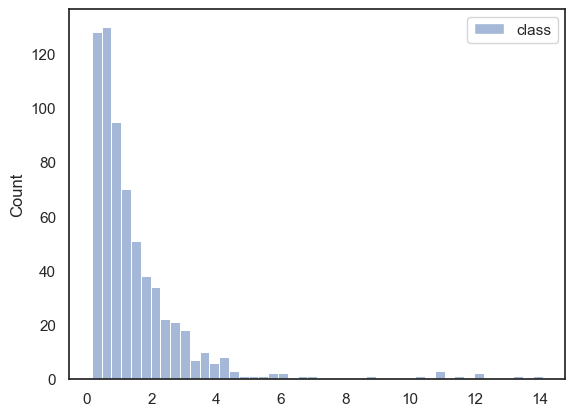

In [45]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_np,
)

Generate class 2

In [46]:
class2_np = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_relevant_features,
    scale=1,
)
class2_np = artificial_data_generator_tools.build_class(class_features_list=[class2_np])

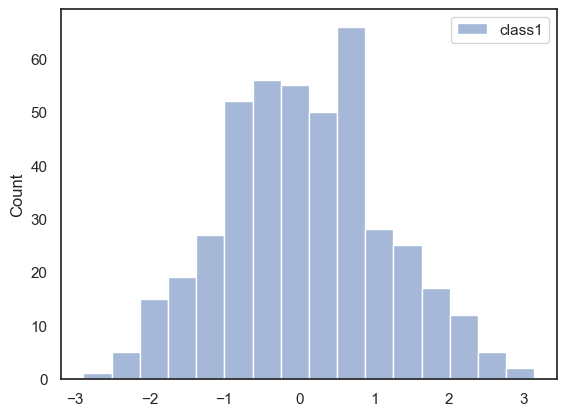

In [47]:
label_class_2 = 1
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_np, label_class_2)

In [48]:
artificial_data_generator_tools.plot_distributions_of_all_classes([log_normal_distributed_class1_np, class2_np])

ValueError: Length of values (435) does not match length of index (645)

In [49]:
shifted_class1_np = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_np, effect_size=2
)

In [50]:
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_np, class2_np])

ValueError: Length of values (435) does not match length of index (645)

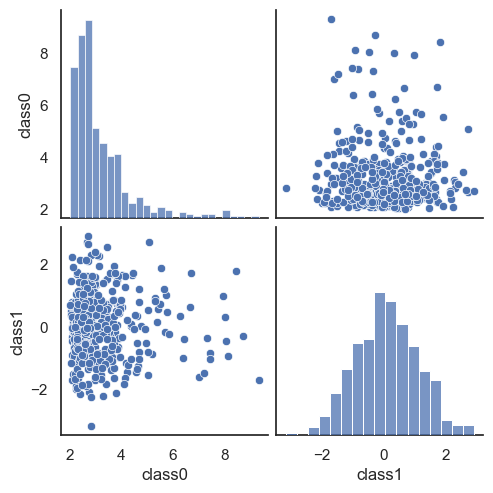

In [29]:
artificial_data_generator_tools.plot_correlation_between_classes([shifted_class1_np, class2_np])

In [30]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_np, class2_np],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
print(artificial_data_df.shape)
print(artificial_data_df.head())

(30, 141)
   label      bm_0      bm_1      bm_2      bm_3      bm_4      bm_5  \
0    0.0  2.309864  2.306996  2.174504  2.218227  2.398460  2.098636   
1    0.0  3.398217  2.515823  2.692557  2.809804  2.390850  2.531695   
2    0.0  7.306999  3.218529  4.405316  5.407412  4.381455  4.700504   
3    0.0  2.727537  2.582461  2.490792  2.288709  2.791125  2.470481   
4    0.0  2.151240  2.191291  2.125423  2.111468  2.099304  2.293428   

       bm_6      bm_7      bm_8  ...     rf_90     rf_91     rf_92     rf_93  \
0  2.361831  2.342401  2.271707  ...  0.742050  0.448230  0.596556  0.449399   
1  2.424161  2.844817  2.527301  ...  0.799425  0.674684  0.374394  0.788031   
2  6.393532  3.005175  3.154469  ...  0.374128  0.554323  0.033575  0.765969   
3  2.679179  2.685776  2.806078  ...  0.649506  0.793818  0.935651  0.572806   
4  2.056880  2.087010  2.144470  ...  0.102109  0.840989  0.496663  0.975089   

      rf_94     rf_95     rf_96     rf_97     rf_98     rf_99  
0  0.209069 